In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, END, START, add_messages
from langchain_core.messages import HumanMessage, BaseMessage
from typing import TypedDict,Annotated

In [36]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [37]:
class ChatbotState(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]

In [38]:
def func(state: ChatbotState):

    response = llm.invoke(state["message"])
    return {"message":[response]}

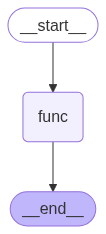

In [39]:
graph = StateGraph(ChatbotState)

graph.add_node("func",func)

graph.add_edge(START, "func")
graph.add_edge("func",END)

workflow = graph.compile()
workflow

In [46]:
m = {"message": [HumanMessage(content="Who is the president of usa?")]}

workflow.invoke(m)["message"][-1].content

'The current president of the United States is **Joe Biden**.'

In [28]:
while True:
    question = input()
    
    if question.strip().lower() in ["quit","exit"]:
        print("Exiting...")
        break
    else:
        res = workflow.invoke({"message" :question})
        print(res)

{'message': [HumanMessage(content='hii', additional_kwargs={}, response_metadata={}, id='3a1a00d4-e37c-4618-9218-4668717aba9a')]}
{'message': [HumanMessage(content='how are you', additional_kwargs={}, response_metadata={}, id='ba5b3a48-5048-485c-87db-341398d8b591')]}
Exiting...
